<a href="https://colab.research.google.com/github/mcPython95/Article_type_classification/blob/main/Article_type_classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Text classification - Article Type classification***

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install libraries

In [ ]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

# Parent directory path

In [ ]:
#declare parent directory to read and write files
parent_dir = '/content/drive/MyDrive/cape_start_accessment/'

# Read data


In [ ]:
df = pd.read_csv(parent_dir +"articles.csv",encoding = 'iso-8859-1')
df.head(10)

,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive
5,142dd70c-cf18-42d5-a319-f36f2858dee1,Highlights of CES 2019,NaN,The Daily Star,<p>The LG Signature OLED TV R is a 65-inch 4K ...,<p>The LG Signature OLED TV R is a 65-inch 4K ...,Commercial,Positive
6,f096edd3-13db-4ae2-b17c-a5038afa56be,Le Concept Vision Urbanetic Mercedes Entend Ré...,NaN,Eric Houguet,<p>Le concept Vision Urbanetic Mercedes permet...,<p>Le concept Vision Urbanetic Mercedes permet...,Commercial,Positive
7,f8f917ec-0cb0-4a4d-986e-6839a554c1d1,Bell Company Announces Urban Air Taxi Nexus Co...,http://upload.cannews.com.cn/2019/0114/1547439...,CanNews,<p>Bell recently announced the detailed design...,<p>Bell recently announced the detailed design...,Commercial,Positive
8,1702dec7-7424-4695-92d1-58b4562fa039,Bell Helicopter Makes Debut as First Major Hel...,NaN,AviationPros,"<p>Bell Helicopter, a Textron Inc. company and...","<p>Bell Helicopter, a Textron Inc. company and...",Commercial,Positive
9,1d110da1-05c7-4678-881d-0c544e6429d5,Bell Helicopter Unveils Nexus Air Taxi Concept...,NaN,Opulent Club,<p>Bell Helicopter has unveiled the full-scale...,<p>Bell Helicopter has unveiled the full-scale...,Commercial,Positive


In [ ]:
df.columns

Index(['Id', 'Heading', 'Article.Banner.Image', 'Outlets',
       'Article.Description', 'Full_Article', 'Article_Type', 'Tonality'],
      dtype='object')

In [ ]:
df.shape

(4305, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    4305 non-null   object
 1   Heading               4305 non-null   object
 2   Article.Banner.Image  1753 non-null   object
 3   Outlets               4305 non-null   object
 4   Article.Description   4305 non-null   object
 5   Full_Article          4305 non-null   object
 6   Article_Type          4305 non-null   object
 7   Tonality              3873 non-null   object
dtypes: object(8)
memory usage: 269.2+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
Id,4305,4305,d6995462-5e87-453b-b64d-e9f1df6e94d2,1
Heading,4305,4020,Boeing CEO: First Operational Self-Flying Cars...,8
Article.Banner.Image,1753,1686,https://mmbiz.qpic.cn/mmbiz_jpg/myicofuNe4kzyY...,3
Outlets,4305,1762,WeChat,208
Article.Description,4305,4291,In the intense contest to replace the Armys c...,2
Full_Article,4305,4305,<p>The helicopter that crashed in Southeast Al...,1
Article_Type,4305,7,Commercial,2470
Tonality,3873,3,Positive,3286


In [ ]:
df['Article_Type'].unique()

array(['Commercial', 'Military', 'Training', 'Executives', 'Others',
       'Financing', 'Support & Services'], dtype=object)

In [ ]:
df['Tonality'].unique()

array(['Negative', 'Positive', nan, 'Neutral'], dtype=object)

# Preprocessing

In [ ]:
import pandas as pd
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

import pandas as pd
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import html

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text(texts, lemmatize=True, handle_html=True):
    preprocessed_texts = []

    for text in texts:
        # Handle HTML tags and entities
        if handle_html:
            text = html.unescape(text)
            text = re.sub(r'<[^>]+>', '', text)

        # Convert to lowercase (if not handled by spacy model)
        text = text.lower()

        # Replace non-standard apostrophes and other special characters
        text = re.sub(r'[^\x00-\x7F]+', '', text)

        # Tokenize using spacy
        doc = nlp(text)

        # Lemmatize and remove stopwords and punctuations
        words = []
        for token in doc:
            if token.is_stop:
                continue
            if token.is_punct:
                continue
            if lemmatize:
                words.append(token.lemma_)
            else:
                words.append(token.text)

        # Join the words back into a single string
        preprocessed_text = ' '.join(words)

        # Additional check to remove leading and trailing spaces
        preprocessed_text = preprocessed_text.strip()

        preprocessed_texts.append(preprocessed_text)

    return preprocessed_texts


#copy dataframe to avoid conflicts
df_ = df.copy()

#Data cleaning
# Remove rows with missing values in relevant columns
df_.dropna(subset=['Heading', 'Full_Article', 'Article_Type'], inplace=True)

text_sample = list(df_['Full_Article'][:5])

preprocessed_texts = preprocess_text(text_sample)

print("\nPreprocessing Full article (sample):\n")

for text, preprocessed_text in zip(text_sample, preprocessed_texts):
    print("Original Text:", text)
    print("Preprocessed Text:", preprocessed_text)
    print("-" * 50)

text_sample_2 = list(df_['Heading'][:5])

preprocessed_texts_2 = preprocess_text(text_sample_2)


print("\nPreprocessing Heading (sample):\n")

for text, preprocessed_text in zip(text_sample_2, preprocessed_texts_2):
    print("Original Text:", text)
    print("Preprocessed Text:", preprocessed_text)
    print("-" * 50)



Preprocessing Full article (sample):

Original Text: <p>The helicopter that crashed in Southeast Alaska in late September, killing three people, entered a 500-foot freefall before dropping to a Glacier Bay National Park beach, according to by the National Transportation Safety Board.&nbsp;The preliminary NTSB report released Friday offers no official probable cause. That determination won&lsquo;t be made until next year at the earliest.</p>
Preprocessed Text: helicopter crash southeast alaska late september kill people enter 500 foot freefall drop glaci bay national park beach accord national transportation safety board.the preliminary ntsb report release friday offer official probable cause determination will not year early
--------------------------------------------------
Original Text: <p>A year after teasing the fledgling electric vertical-takeoff-and-landing (eVTOL) industry with a mockup of a futuristic air taxi cabin, rotary-wing giant Bell has unveiled the first major configu

In [ ]:
df_['Heading'] = df_['Heading'].apply(lambda x: preprocess_text([x])[0])
df_['Heading'].head(10)

0    puzzle maneuver freefall ntsb report provide n...
1    bell nexus air taxi concept ring change evtol ...
2                       bell helicopter air taxi nexus
3    bell dvoile la conception intgrale de son taxi...
4                 les premiers retour dolivier ezratty
5                                    highlight ce 2019
6    le concept vision urbanetic mercede entend rpo...
7    bell company announce urban air taxi nexus con...
8    bell helicopter make debut major helicopter ma...
9     bell helicopter unveil nexus air taxi concept ce
Name: Heading, dtype: object

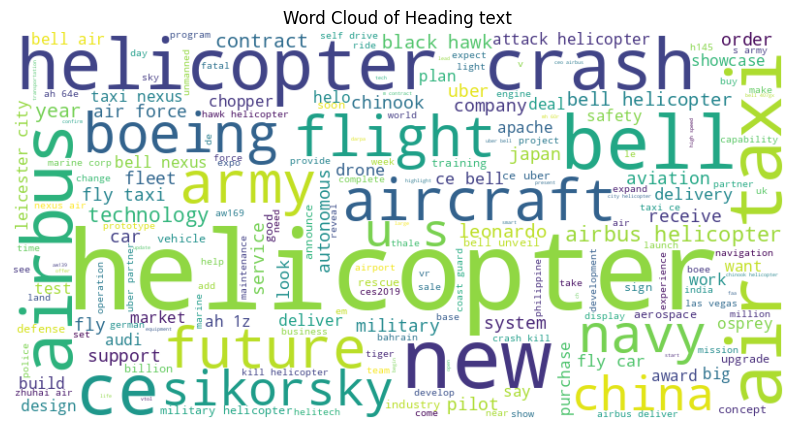

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_combined = ' '.join(df_['Heading'].values)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Heading text')
plt.axis('off')
plt.show()


In [ ]:
df_['Full_Article'] = df_['Full_Article'].apply(lambda x: preprocess_text([x])[0])
df_['Full_Article'].head(10)

0    helicopter crash southeast alaska late septemb...
1    year tease fledgling electric vertical takeoff...
2    bell release size design vertical landing vtol...
3    bell est une socit amricaine dirige par mitch ...
4    anecdotal observe explosion passenger drone pr...
5    lg signature ole tv r 65 inch 4k tv stun viewe...
6    le concept vision urbanetic mercede permet le ...
7    bell recently announce detailed design urban a...
8    bell helicopter textron inc company major glob...
9    bell helicopter unveil scale design model nexu...
Name: Full_Article, dtype: object

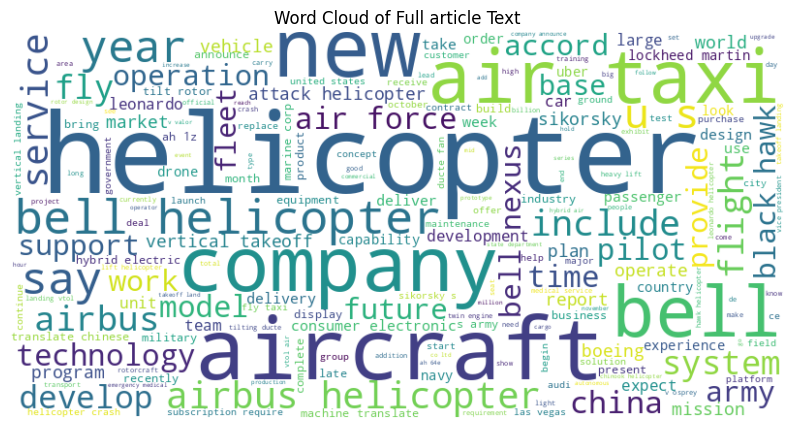

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_combined = ' '.join(df_['Full_Article'].values)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Full article Text')
plt.axis('off')
plt.show()


# Feature extraction using SentenceTransformer


In [ ]:
from sentence_transformers import SentenceTransformer

# Load pre-trained SentenceBERT model
st_model = SentenceTransformer('bert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Vectorize the text columns
headings_embeddings = st_model.encode(df_['Heading'].tolist())
articles_embeddings = st_model.encode(df_['Full_Article'].tolist())

In [ ]:
# Check the shapes to ensure they are loaded correctly
print("headings embeddings:", headings_embeddings.shape)
print("articles embeddings:", articles_embeddings.shape)

headings embeddings: (4305, 768)
articles embeddings: (4305, 768)


In [ ]:
# Save embeddings to CSV files
np.savetxt(parent_dir + 'headings_embeddings.csv', headings_embeddings, delimiter=',')
np.savetxt(parent_dir + 'articles_embeddings.csv', articles_embeddings, delimiter=',')

print("Embeddings saved successfully.")

Embeddings saved successfully.


In [ ]:
import numpy as np

# Load embeddings from CSV files
headings_embeddings = np.loadtxt(parent_dir + 'headings_embeddings.csv', delimiter=',')
articles_embeddings = np.loadtxt(parent_dir + 'articles_embeddings.csv', delimiter=',')

print("Embeddings loaded successfully.")

# Check the shapes to ensure they are loaded correctly
print("Shape of loaded headings embeddings:", headings_embeddings.shape)
print("Shape of loaded articles embeddings:", articles_embeddings.shape)


Embeddings loaded successfully.
Shape of loaded headings embeddings: (4305, 768)
Shape of loaded articles embeddings: (4305, 768)


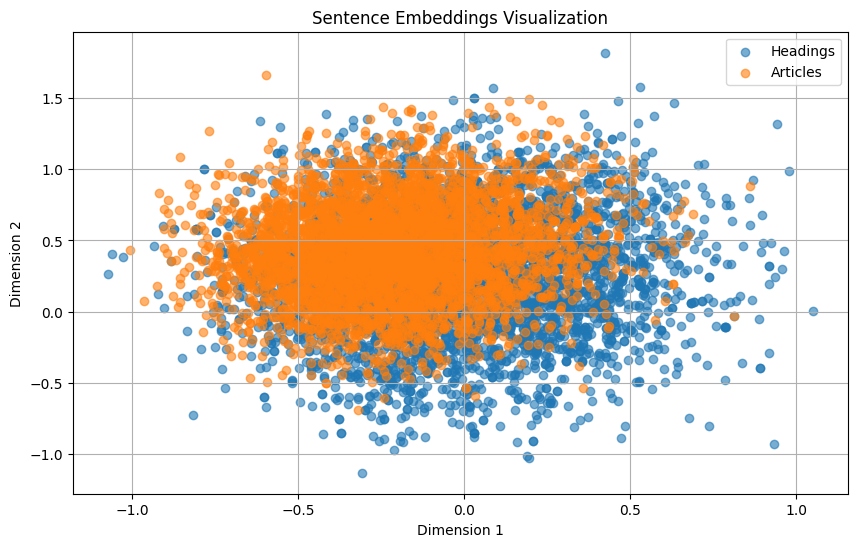

In [ ]:
import matplotlib.pyplot as plt


# Extract x and y coordinates for plotting (for simplicity, take first two dimensions)
x_headings = headings_embeddings[:, 0]
y_headings = headings_embeddings[:, 1]

x_articles = articles_embeddings[:, 0]
y_articles = articles_embeddings[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_headings, y_headings, label='Headings', alpha=0.6)
plt.scatter(x_articles, y_articles, label='Articles', alpha=0.6)

plt.title('Sentence Embeddings Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_['Article_Type'].value_counts()

Article_Type
Commercial            2470
Military              1677
Executives              65
Others                  52
Support & Services      26
Financing                9
Training                 6
Name: count, dtype: int64

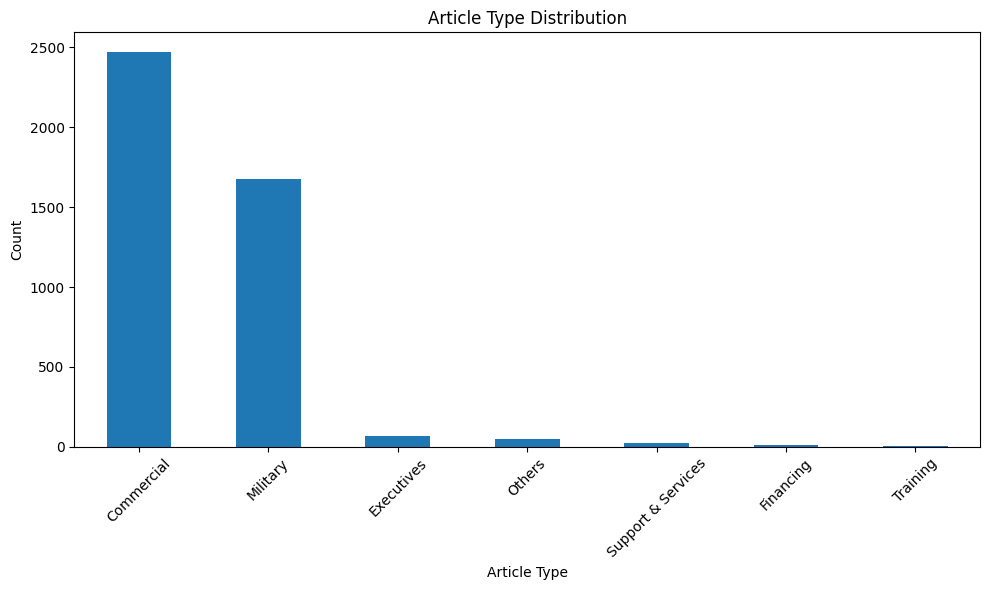

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_ is your DataFrame
article_type_counts = df_['Article_Type'].value_counts()

plt.figure(figsize=(10, 6))
article_type_counts.plot(kind='bar')
plt.title('Article Type Distribution')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Balance the data

Class distribution before SMOTE (y):
Article_Type
Commercial            2470
Military              1677
Executives              65
Others                  52
Support & Services      26
Financing                9
Training                 6
Name: count, dtype: int64

Class distribution After SMOTE (y resampled):
0    2470
3    2470
6    2470
1    2470
4    2470
2    2470
5    2470
Name: count, dtype: int64

Class distribution within Training Set (y_train):
1    1995
6    1987
4    1976
2    1976
0    1971
5    1964
3    1963
Name: count, dtype: int64

Class distribution within Testing Set (y_test):
3    507
5    506
0    499
4    494
2    494
6    483
1    475
Name: count, dtype: int64


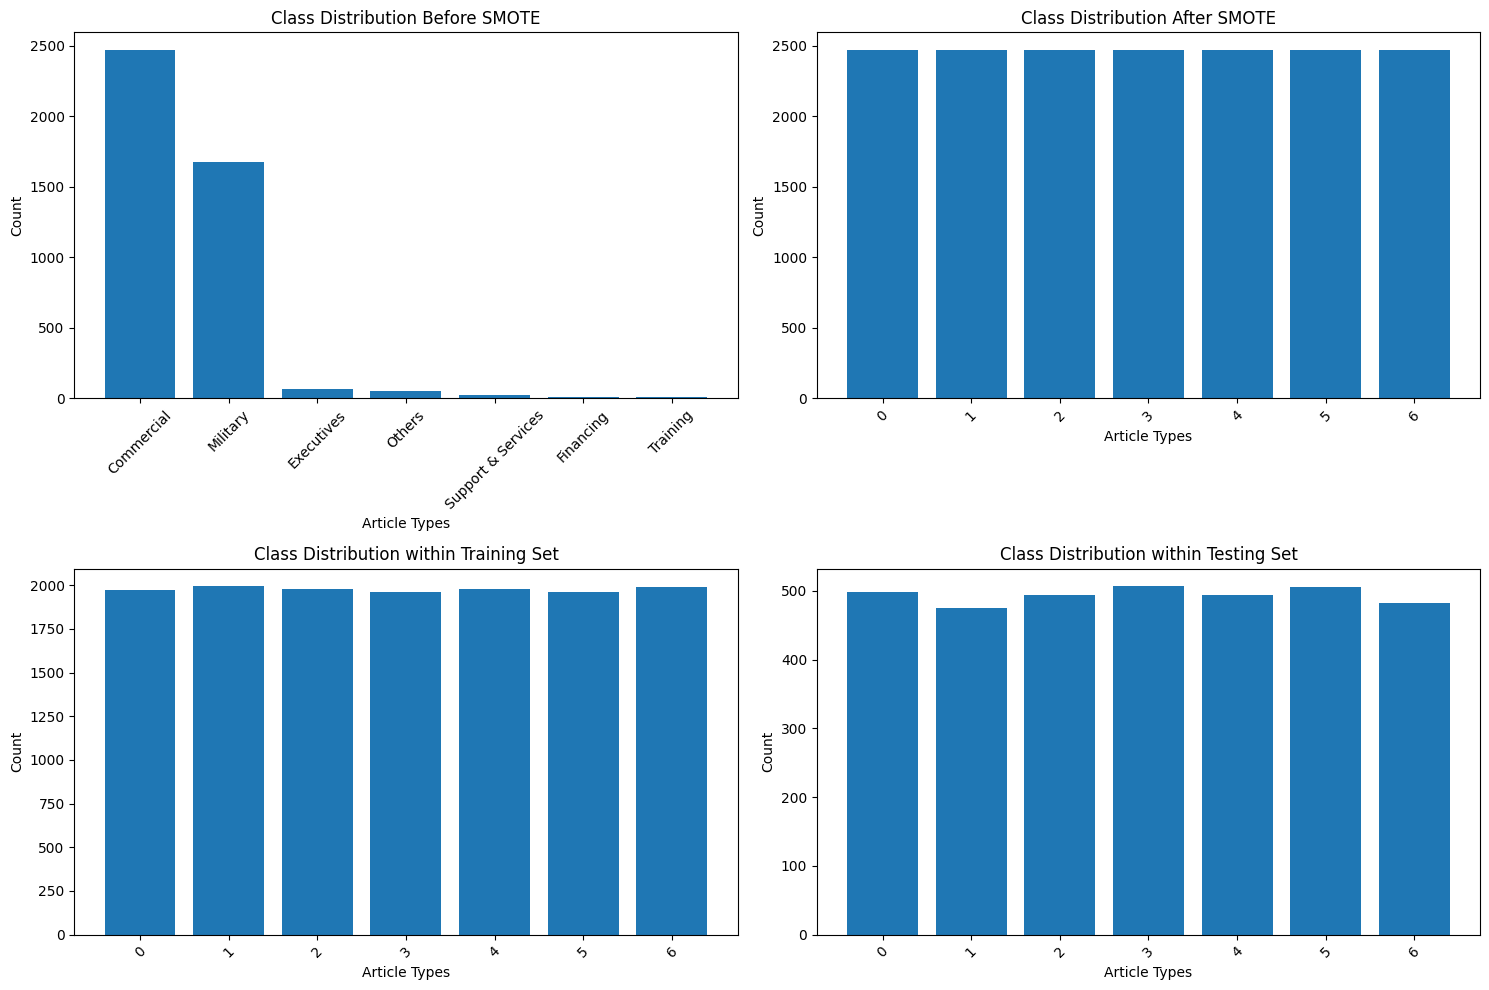

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming headings_embeddings and articles_embeddings are already created and loaded
X = np.hstack((headings_embeddings, articles_embeddings))

# Assuming df_['Article_Type'] contains categorical labels as strings
y = df_['Article_Type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical labels
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to categorical format
num_classes = len(np.unique(y_encoded))
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Check class distribution before SMOTE
class_counts_before = y.value_counts()
print("Class distribution before SMOTE (y):")
print(class_counts_before)

# Check class distribution after SMOTE
class_counts_after = pd.Series(y_resampled).value_counts()
print("\nClass distribution After SMOTE (y resampled):")
print(class_counts_after)

# Check class distribution within training set
class_counts_train = pd.Series(y_train).value_counts()
print("\nClass distribution within Training Set (y_train):")
print(class_counts_train)

# Check class distribution within testing set
class_counts_test = pd.Series(y_test).value_counts()
print("\nClass distribution within Testing Set (y_test):")
print(class_counts_test)

# Create subplots for class distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Class distribution before SMOTE
axes[0, 0].bar(class_counts_before.index, class_counts_before.values)
axes[0, 0].set_title('Class Distribution Before SMOTE')
axes[0, 0].set_xlabel('Article Types')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Class distribution after SMOTE
axes[0, 1].bar(class_counts_after.index, class_counts_after.values)
axes[0, 1].set_title('Class Distribution After SMOTE')
axes[0, 1].set_xlabel('Article Types')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Class distribution within Training Set
axes[1, 0].bar(class_counts_train.index, class_counts_train.values)
axes[1, 0].set_title('Class Distribution within Training Set')
axes[1, 0].set_xlabel('Article Types')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Class distribution within Testing Set
axes[1, 1].bar(class_counts_test.index, class_counts_test.values)
axes[1, 1].set_title('Class Distribution within Testing Set')
axes[1, 1].set_xlabel('Article Types')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pickle

print("Mapping of classes:\n")
class_names = {}
for index, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {index}")
    class_names[index] = label

print("\nClass names dictionary:")
print(class_names)

# Save the class names to a .pkl file
with open(parent_dir + 'class_names.pkl', 'wb') as file:
    pickle.dump(class_names, file)

Mapping of classes:

Commercial -> 0
Executives -> 1
Financing -> 2
Military -> 3
Others -> 4
Support & Services -> 5
Training -> 6

Class names dictionary:
{0: 'Commercial', 1: 'Executives', 2: 'Financing', 3: 'Military', 4: 'Others', 5: 'Support & Services', 6: 'Training'}


# Build model

#  Linear Support Vector Classifier

*   LinearSVC is a machine learning model for classification tasks that uses a linear support vector machine (SVM) algorithm. It is implemented in the scikit-learn library, which is widely used for various machine learning applications.
*   SVM is a supervised machine learning algorithm used for classification and regression tasks.It works by finding the hyperplane that best separates the data into different classes.
*   A linear SVM specifically deals with data that can be linearly separated by a straight line (or a hyperplane in higher dimensions).It aims to find the maximum margin hyperplane that best divides the data into classes.
*   LinearSVC uses the one-vs-rest (OvR) strategy for multi-class classification. This involves training one classifier per class, making it robust and efficient for multi-class problems.
*   Text data when vectorized results in high-dimensional feature spaces. Linear models like LinearSVC tend to perform well in these high-dimensional spaces.







# Hyperparameter tuning

The parameters listed (C, loss, penalty) are hyperparameters for the LinearSVC model in scikit-learn. Here’s a breakdown of what each parameter means:

1. C:
Definition: The regularization parameter.
Role: It controls the trade-off between achieving a low training error and a low testing error (generalization).
Details:
Small C Value: The model will have higher regularization, meaning it will allow more slack (margin violations) to prevent overfitting. It results in a simpler decision boundary.
Large C Value: The model will have lower regularization, meaning it will aim to fit the training data as well as possible, which could lead to overfitting.
2. loss:
Definition: The loss function to be used.
Options:
'hinge': The standard hinge loss used by SVM. It tries to ensure that the samples are classified correctly with a margin.
'squared_hinge': The squared hinge loss, which squares the hinge loss. It generally leads to a smoother optimization problem but with different theoretical properties.
3. penalty:
Definition: The norm used in the penalization (regularization term).
Options:
'l2': L2 norm (Ridge) regularization. It penalizes the sum of the squares of the coefficients. This is the default regularization.
'l1': L1 norm (Lasso) regularization. It penalizes the sum of the absolute values of the coefficients, which can lead to sparse models (many coefficients being zero).



In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np


# Define the model and parameters grid for hyperparameter tuning
model = LinearSVC(max_iter=100, random_state=42)
params_grid = {
    'C': [0.1, 1.0, 5.0, 10.0, 20.0],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge']
}

# Initialize GridSearchCV with your model and parameters grid
grid_search = GridSearchCV(estimator=model, param_grid=params_grid, cv=5, scoring='accuracy')

# Perform Grid Search on your training data
grid_search.fit(X_train, y_train)

# Print the best score and best parameters found by GridSearchCV
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.9793957605400493
Best Parameters: {'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'}


# Validate and evaluate the Accuracy using 5-fold Cross-validation method

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import LinearSVC

best_model = grid_search.best_estimator_

# Initialize KFold for cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print(f"\nMean Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")


Cross-validation Scores: [0.97542465 0.97831587 0.97866956 0.97722343 0.97903109]

Mean Cross-Validation Accuracy: 0.9777 ± 0.0013


# Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Predict probabilities on the test set
y_pred_prob = best_model.decision_function(X_test)

# Predict class labels
y_pred = best_model.predict(X_test)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       499
           1       1.00      1.00      1.00       475
           2       1.00      1.00      1.00       494
           3       0.92      0.94      0.93       507
           4       0.98      1.00      0.99       494
           5       1.00      1.00      1.00       506
           6       1.00      1.00      1.00       483

    accuracy                           0.98      3458
   macro avg       0.98      0.98      0.98      3458
weighted avg       0.98      0.98      0.98      3458



# Confusion matrix

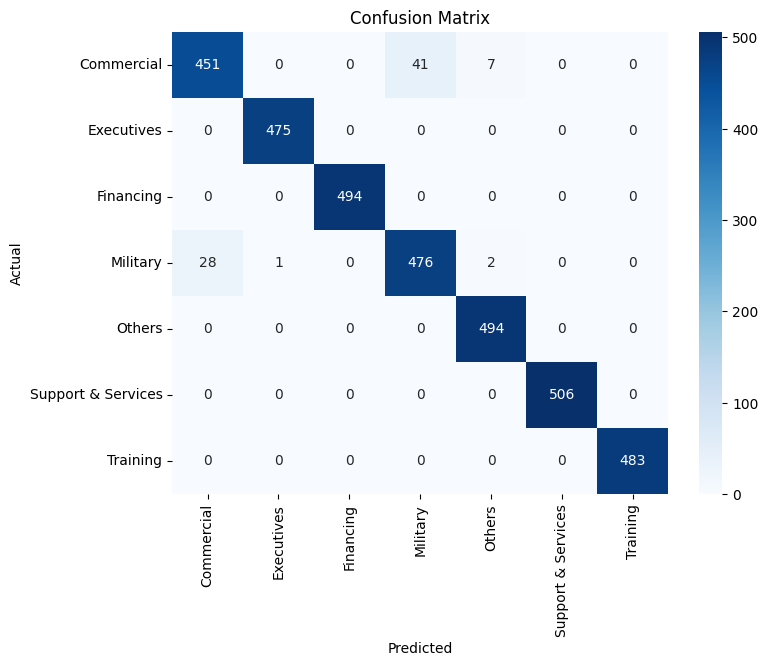

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Receiver Operating Characteristic curve (ROC)

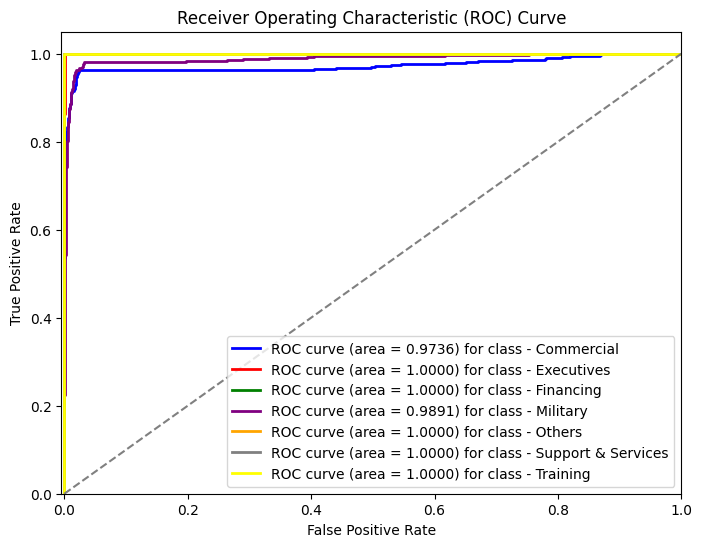

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_score = best_model.decision_function(X_test)
# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange','grey','yellow']  # Add more colors as needed
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = %0.4f) for class - %s' % (roc_auc[i], class_names[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,roc_auc_score, recall_score, f1_score, classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")

# Calculate specificity for each class
specificity = []
for i in range(cm.shape[0]):
    true_negatives = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
    false_positives = np.sum(cm[:, i]) - cm[i, i]
    spec = true_negatives / (true_negatives + false_positives)
    specificity.append(spec)

# Calculate average specificity across all classes
overall_specificity = np.mean(specificity)

print(f"Specificity: {overall_specificity:.4f}")

# roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro')
# print(f"ROC-AUC (Macro): {roc_auc:.4f}")

Accuracy: 0.9772
Precision: 0.9771
Recall: 0.9772
F1-score: 0.9770
Error Rate: 0.0228
Specificity: 0.9962


# Save model

In [ ]:
import pickle

#`best_model` is the trained LinearSVC model
with open(parent_dir + 'article_type_classifier_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


# Load model

In [ ]:
import pickle

# Load the saved model
with open(parent_dir + 'article_type_classifier_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# Predictions

In [ ]:
class_names

{0: 'Commercial',
 1: 'Executives',
 2: 'Financing',
 3: 'Military',
 4: 'Others',
 5: 'Support & Services',
 6: 'Training'}

In [ ]:
from sentence_transformers import SentenceTransformer
import random

st_model = SentenceTransformer('bert-base-nli-mean-tokens')


# Initialize lists to store actual and predicted labels
actual_labels = []
predicted_labels = []

for article_type in df['Article_Type'].unique():

    #listing out the indexes of specific article type
    arrs = list(df[['Heading','Full_Article','Article_Type']][df['Article_Type'] ==   article_type].index)

    #rshuffle the arrays for random predictions
    random.shuffle(arrs)

    print('-'*50)
    print(f"Actual label : {article_type}")
    print('-'*50)

    #Take 1st 10 sample predictions
    for arr in arrs[:10]:

      test_data = list(df[['Heading','Full_Article']].iloc[arr])

      pre_processed_text =  list(map(preprocess_text,[test_data]))

      # Vectorize the text columns
      head_emd = st_model.encode(pre_processed_text[0][0])
      art_emd = st_model.encode(pre_processed_text[0][1])

      X_new = np.hstack((head_emd, art_emd))

      # Make predictions
      y_pred = loaded_model.predict([X_new])


      actual_label = article_type
      predicted_label = class_names[y_pred[0]]

      print("Predicted label:", predicted_label)

      # Append actual and predicted labels
      actual_labels.append(actual_label)
      predicted_labels.append(predicted_label)


--------------------------------------------------
Actual label : Commercial
--------------------------------------------------
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
Predicted label: Commercial
--------------------------------------------------
Actual label : Military
--------------------------------------------------
Predicted label: Military
Predicted label: Military
Predicted label: Military
Predicted label: Military
Predicted label: Military
Predicted label: Military
Predicted label: Military
Predicted label: Military
Predicted label: Military
Predicted label: Military
--------------------------------------------------
Actual label : Training
--------------------------------------------------
Predicted label: Training
Predicted label: Training
Predicted label: Training
Pr

<Figure size 1000x800 with 0 Axes>

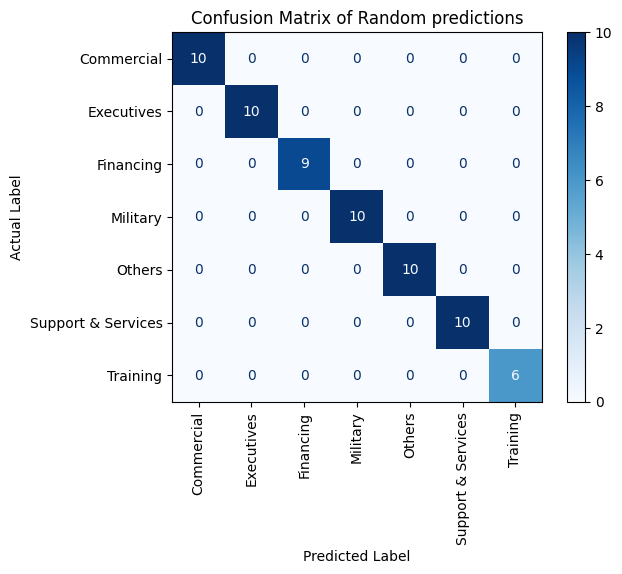

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(actual_labels, predicted_labels, labels=list(class_names.values()))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names.values())
disp.plot(cmap=plt.cm.Blues, values_format='.0f')
plt.title('Confusion Matrix of Random predictions')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=90)
plt.show()